# XGBoost
XGBoost or Extreme Gradient Boosting is a type of boosting library which uses the gradient boosting framework to find the minima of loss function to reduce or minimize errors and it has regularization methods built into it. It is initialised by mean regressor or base class for predictions. It creates trees which all try to minimize their predecessor's errors. Its features are:

* Speed and Performance: Optimized for fast training and prediction using parallel processing, tree pruning, and other techniques.
* Regularization: Includes L1 and L2 regularization to reduce overfitting.
* Handling of Missing Data: Automatically learns how to handle missing values.
* Distributed Computing: Supports distributed computing for large datasets.
* Custom Objectives: Allows users to define custom loss functions.
* Tree Pruning: Uses a depth-first approach to find the optimal split points.
* Scalability: Can handle large-scale datasets and a variety of data formats.

In [1]:
# Importing libraries
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [4]:
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

In [5]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
y_pred = model.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

1.0

The true potential of XGBoost can only be realised with a big dataset.

# DBScan
It is a density based clustering algorithm. It differentiates between dense areas with the help of sparse regions. It does that by using 2 hyperparameters, epsilon and minpoints. Epsilon is the radius of the cluster and minpoints defines the minimum number of points required for that cluster to be called dense. It has three types of points, which are:-

* Core point - A point having atleast minpoints points inside its epsilon circle.
* Border point - A point having less than min points inside its epslon cirlce but has a core point in its circle.
* Noise point - A point which is neither of the above.

In [8]:
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

<Axes: >

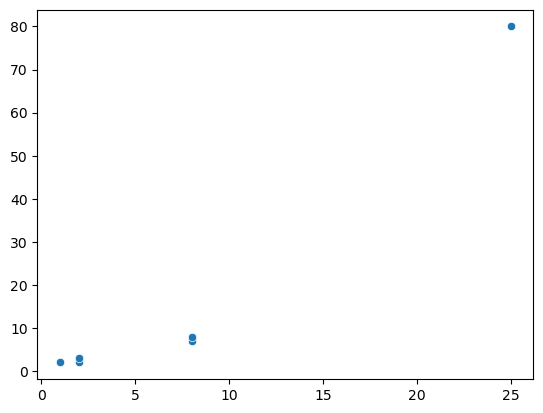

In [9]:
sns.scatterplot(x=X[:, 0], y=X[:, 1])

In [10]:
db = DBSCAN(eps=3, min_samples=2)

In [11]:
db.fit(X)
db.labels_

array([ 0,  0,  0,  1,  1, -1])

From the above array we can see that dbscan has created 2 clusters with the name or index 0 and 1. -1 represents noise within the data.

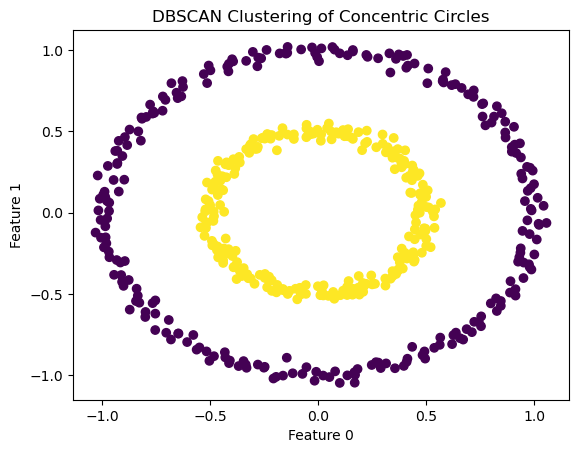

In [12]:
X, _ = make_circles(n_samples=500, factor=.5, noise=.03, random_state=4)

dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering of Concentric Circles")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

From the above plot we can see that DBSCAN was able to correctly identify the clusters whereas K-Means would not have performed well.

# Imbalanced Datasets
In real world the data we get are generally imbalanced meaning that the classes of the data are imbalanced. Some classes have much higher number of records and others are have much less. This creates a bias in our model as it prioritizes the majority and ignores the minority. This leads up to a major problem as in real world the data in some important cases like disease finding, fraud detection, etc have less data and the prediction of minority is more important. To solve this we use various balancing methods which are:-

* Under Sampling - From the majority class, we only choose the number of records which match upto the minority class.
* Over Sampling - From the minority class, we pick from it multiple times until the number matches that of majority class.
* SMOTE - SMOTE or Synthetic Minority Over Sampling Technique is oversampling technique. It uses interpolation technique to generate new points between existing data points.
* Ensemble Methods - We create multiple models with sampled majority class and all of minority class. Basically create a balance in each model.
* Cost Sensitive Learning - We modify our learning techniques of our models in such a way that a balance is created when training the data. We can do this by adding weights to each class or using custom loss functions.

In [13]:
np.random.seed(42)
n_samples_1 = 25  
n_samples_2 = 375  
centers = [(0, 0), (2, 2)]
cluster_std = [1.5, 1.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=0)

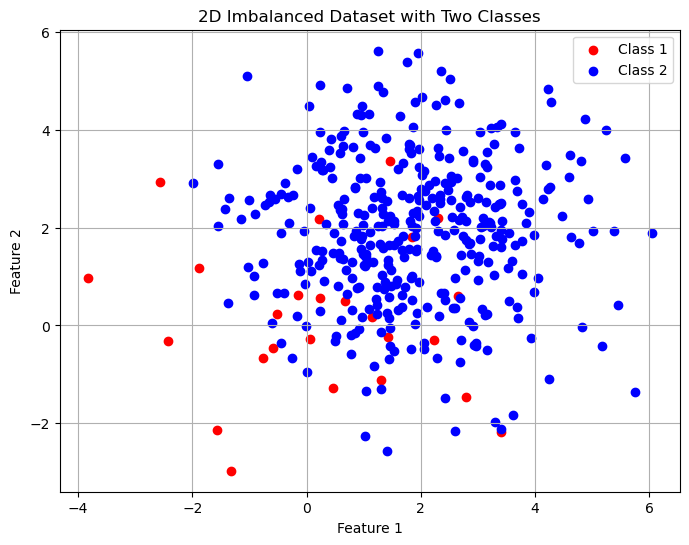

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

As we can see we have an unbalanced dataset having class 2 as majority and class 1 as minority. Lets try to use SMOTE to balance this.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

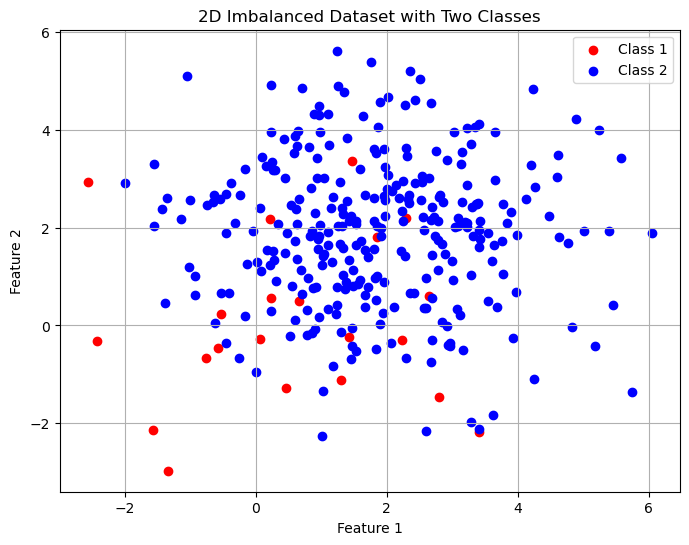

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

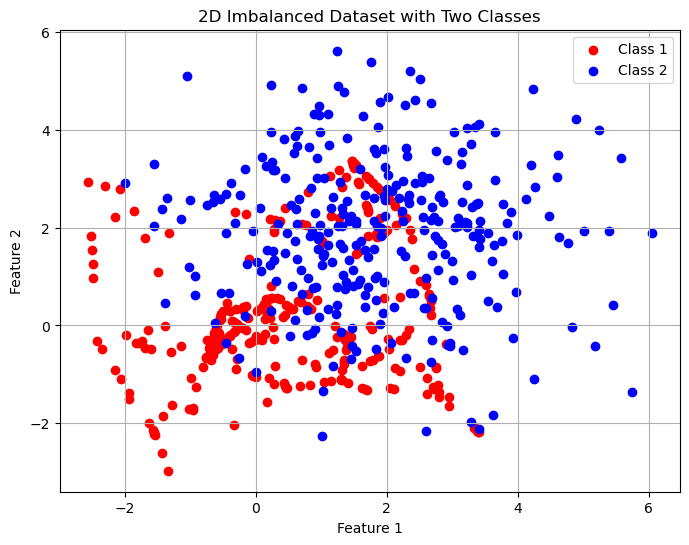

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_resampled_smote[y_resampled_smote == 0][:, 0], X_resampled_smote[y_resampled_smote == 0][:, 1], color='red', label='Class 1')
plt.scatter(X_resampled_smote[y_resampled_smote == 1][:, 0], X_resampled_smote[y_resampled_smote == 1][:, 1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

As we can see SMOTE has created multiple dummy data points for us. But this method has a flaw, it uses KNN which is both mathematically complex but also prone to outliers. Lets use Ensemble methods instead.

In [18]:
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = BalancedRandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

/home/anish/anaconda3/envs/mobcoder_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/anish/anaconda3/envs/mobcoder_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/anish/anaconda3/envs/mobcoder_env/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` 

BalancedRandomForestClassifier(random_state=42)

In [20]:
y_pred_brf = classifier.predict(X_test)
y_proba_brf = classifier.predict_proba(X_test)[:, 1]
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_brf))
print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_brf))

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.16      0.75      0.26         4
           1       0.98      0.79      0.88        76

    accuracy                           0.79        80
   macro avg       0.57      0.77      0.57        80
weighted avg       0.94      0.79      0.85        80

ROC AUC Score (With SMOTE): 0.8519736842105262


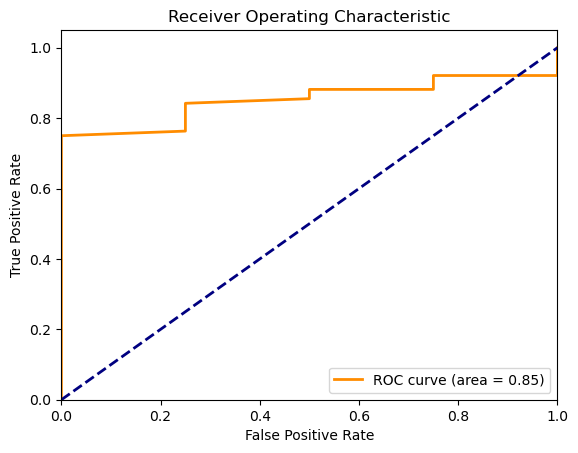

In [21]:
fpr_brf, tpr_brf, _ = roc_curve(y_test, y_proba_brf)
plt.figure()
plt.plot(fpr_brf, tpr_brf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_brf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

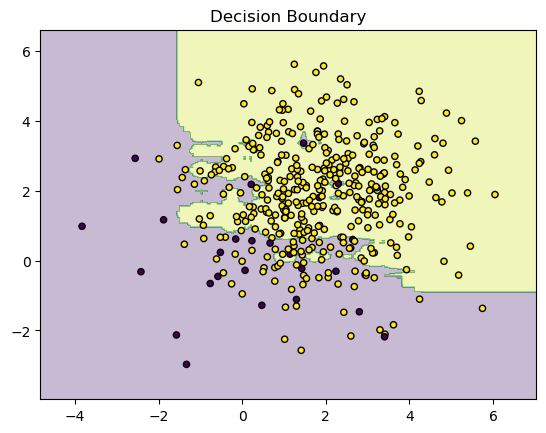

In [22]:
plot_decision_boundaries_smote(X, y, classifier)

We can see that our ensemble method has also performed well.